In [1]:
#import libraries
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib
from matplotlib import pyplot
%matplotlib inline
import numpy

Using TensorFlow backend.


In [2]:
import glob
from keras.layers import Dropout

In [3]:
df=read_csv('behavior.csv')
df=DataFrame(df)
df

,Unnamed: 0,Av,Rt,Th,Cost
0,2015-03-08,0.381786,0.298058,0.696617,0.664014
1,2015-03-09,0.360913,0.313881,0.634435,0.752660
2,2015-03-10,0.440591,0.292540,0.639504,0.536273
3,2015-03-11,0.499155,0.197158,0.661322,0.785753
4,2015-03-12,0.539133,0.159817,0.660387,0.675462
5,2015-03-13,0.521706,0.311304,0.641472,0.570454
6,2015-03-14,0.536322,0.224361,0.626482,0.710291
7,2015-03-15,0.517141,0.262821,0.620612,0.641154
8,2015-03-16,0.456683,0.284540,0.604847,0.694305
9,2015-03-17,0.468509,0.216095,0.674270,0.706597


In [4]:
df.drop(df.columns[[0,4]],axis=1,inplace=True)
df

,Av,Rt,Th
0,0.381786,0.298058,0.696617
1,0.360913,0.313881,0.634435
2,0.440591,0.292540,0.639504
3,0.499155,0.197158,0.661322
4,0.539133,0.159817,0.660387
5,0.521706,0.311304,0.641472
6,0.536322,0.224361,0.626482
7,0.517141,0.262821,0.620612
8,0.456683,0.284540,0.604847
9,0.468509,0.216095,0.674270


In [5]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    #n_in number of lag observations
    #n_out number of next observations
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [6]:
#from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from numpy import concatenate
# load dataset
values = df.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
#reframed = series_to_supervised(scaled, 8, 4)
# frame as supervised learning
reframed = series_to_supervised(scaled, 12, 4)
# drop columns we don't want to predict
#reframed.drop(reframed.columns[[5,6,7,8]], axis=1, inplace=True)
print(reframed.shape)
print(reframed.head())
# drop columns we don't want to predict

(1425, 48)
    var1(t-12)  var2(t-12)  var3(t-12)  var1(t-11)  var2(t-11)  var3(t-11)  \
12    0.381786    0.298058    0.696617    0.360913    0.313881    0.634435   
13    0.360913    0.313881    0.634435    0.440591    0.292540    0.639504   
14    0.440591    0.292540    0.639504    0.499155    0.197158    0.661322   
15    0.499155    0.197158    0.661322    0.539133    0.159817    0.660387   
16    0.539133    0.159817    0.660387    0.521706    0.311304    0.641472   

    var1(t-10)  var2(t-10)  var3(t-10)  var1(t-9)    ...       var3(t)  \
12    0.440591    0.292540    0.639504   0.499155    ...      0.656693   
13    0.499155    0.197158    0.661322   0.539133    ...      0.647996   
14    0.539133    0.159817    0.660387   0.521706    ...      0.678312   
15    0.521706    0.311304    0.641472   0.536322    ...      0.688392   
16    0.536322    0.224361    0.626482   0.517141    ...      0.657991   

    var1(t+1)  var2(t+1)  var3(t+1)  var1(t+2)  var2(t+2)  var3(t+2)  \
12 

In [7]:
flatten_data=numpy.array(reframed)

In [8]:
print(flatten_data.shape)

(1425, 48)


In [9]:
# split into train and test sets 80%
train = flatten_data[:1140,:]
test = flatten_data[1140:,:]
# split into input and outputs
train_X, train_y = train[:, :36], train[:,36:]
test_X, test_y = test[:, :36], test[:,36:]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 12, 3))
test_X = test_X.reshape((test_X.shape[0], 12, 3))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1140, 12, 3) (1140, 12) (285, 12, 3) (285, 12)


In [10]:
from keras import regularizers

In [97]:
# design network
model = Sequential()
model.add(LSTM(16, input_shape=(train_X.shape[1], train_X.shape[2]))) 
model.add(Dropout(0.1))
model.add(Dense(12))#,activation="relu",activity_regularizer=regularizers.l1(0.01)
model.compile(loss='mse', optimizer='adam')  #'mae mse
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 16)                1280      
_________________________________________________________________
dropout_6 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 12)                204       
Total params: 1,484
Trainable params: 1,484
Non-trainable params: 0
_________________________________________________________________


In [98]:
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=10, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Train on 1140 samples, validate on 285 samples
Epoch 1/100
 - 6s - loss: 0.1518 - val_loss: 0.0205
Epoch 2/100
 - 2s - loss: 0.0469 - val_loss: 0.0182
Epoch 3/100
 - 2s - loss: 0.0393 - val_loss: 0.0160
Epoch 4/100
 - 2s - loss: 0.0330 - val_loss: 0.0141
Epoch 5/100
 - 2s - loss: 0.0245 - val_loss: 0.0114
Epoch 6/100
 - 2s - loss: 0.0188 - val_loss: 0.0097
Epoch 7/100
 - 3s - loss: 0.0160 - val_loss: 0.0088
Epoch 8/100
 - 3s - loss: 0.0147 - val_loss: 0.0078
Epoch 9/100
 - 2s - loss: 0.0140 - val_loss: 0.0075
Epoch 10/100
 - 2s - loss: 0.0129 - val_loss: 0.0065
Epoch 11/100
 - 2s - loss: 0.0121 - val_loss: 0.0066
Epoch 12/100
 - 2s - loss: 0.0112 - val_loss: 0.0064
Epoch 13/100
 - 2s - loss: 0.0108 - val_loss: 0.0062
Epoch 14/100
 - 2s - loss: 0.0105 - val_loss: 0.0059
Epoch 15/100
 - 2s - loss: 0.0101 - val_loss: 0.0060
Epoch 16/100
 - 2s - loss: 0.0096 - val_loss: 0.0058
Epoch 17/100
 - 3s - loss: 0.0096 - val_loss: 0.0062
Epoch 18/100
 - 2s - loss: 0.0091 - val_loss: 0.0059
Epoch 19

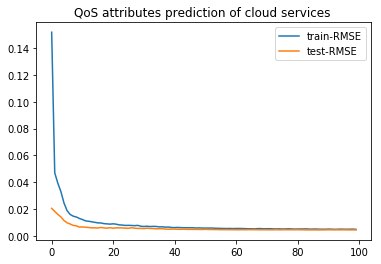

In [99]:
# plot history
pyplot.plot(history.history['loss'], label='train-RMSE')
pyplot.plot(history.history['val_loss'], label='test-RMSE')
pyplot.title("QoS attributes prediction of cloud services ")
pyplot.legend()
pyplot.show()

In [100]:

from math import sqrt
# make a prediction
yhat = model.predict(test_X)
#test_X = test_X.reshape((test_X.shape[0], test_X.shape[1]*test_X.shape[2]))


In [101]:
# invert scaling for forecast
#12/3=4

inv_yhat1 = scaler.inverse_transform(yhat[:,0:3])
inv_yhat2 = scaler.inverse_transform(yhat[:,3:6])
inv_yhat3 = scaler.inverse_transform(yhat[:,6:9])
inv_yhat4 = scaler.inverse_transform(yhat[:,9:12])
inv_yhat = concatenate((inv_yhat1,inv_yhat2 ), axis=1)
inv_yhat = concatenate((inv_yhat,inv_yhat3 ), axis=1)
inv_yhat = concatenate((inv_yhat,inv_yhat4 ), axis=1)
# invert scaling for actual
#test_y = test_y.reshape((len(test_y), 1))
inv_y1 = scaler.inverse_transform(test_y[:,0:3])
inv_y2 = scaler.inverse_transform(test_y[:,3:6])
inv_y3 = scaler.inverse_transform(test_y[:,6:9])
inv_y4 = scaler.inverse_transform(test_y[:,9:12])
inv_y = concatenate((inv_y1,inv_y2 ), axis=1)
inv_y = concatenate((inv_y,inv_y3 ), axis=1)
inv_y = concatenate((inv_y,inv_y4 ), axis=1)

In [102]:
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.067


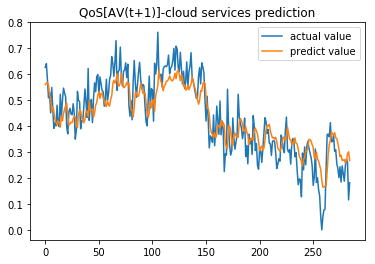

In [103]:
# plot history
pyplot.plot(inv_y[:,0], label='actual value')
pyplot.plot(inv_yhat[:,0], label='predict value')
pyplot.title("QoS[AV(t+1)]-cloud services prediction")
pyplot.legend()
pyplot.show()

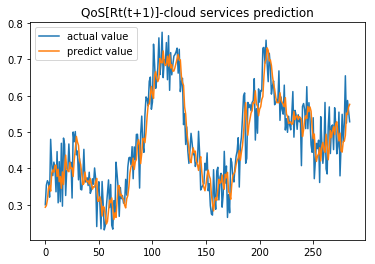

In [104]:
# plot history
pyplot.plot(inv_y[:,1], label='actual value')
pyplot.plot(inv_yhat[:,1], label='predict value')
pyplot.title("QoS[Rt(t+1)]-cloud services prediction")
pyplot.legend()
pyplot.show()

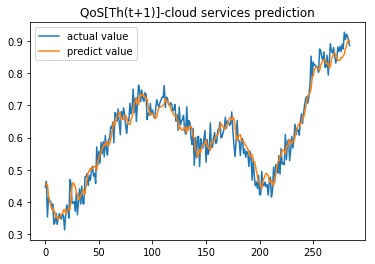

In [105]:
# plot history
pyplot.plot(inv_y[:,2], label='actual value')
pyplot.plot(inv_yhat[:,2], label='predict value')
pyplot.title("QoS[Th(t+1)]-cloud services prediction")
pyplot.legend()
pyplot.show()

In [106]:
results=[]
for i in range(12):
    results.append(sqrt(mean_squared_error(inv_y[:,i], inv_yhat[:,i])))

         Av        Rt        Th
0  0.075337  0.062718  0.035205
1  0.084110  0.064526  0.036349
2  0.089390  0.067381  0.038317
3  0.094718  0.071134  0.040756


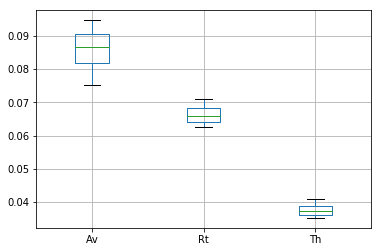

In [107]:
QoS_names=['Av','Rt','Th']
QoS=[]
QoS_total=[]
for i in range(4):
    QoS=results[i*3:i*3+3]
    QoS_total.append(QoS)
QoS_total=DataFrame(QoS_total)
QoS_total.columns=QoS_names
print(QoS_total)
QoS_total.boxplot()

In [85]:
#predict the future 4 values  for each time series
supervised_data = series_to_supervised(scaled[1427:1440],12, 0)   
supervised_data=numpy.array(supervised_data)

In [86]:
#export predicted values for each provider
temp=supervised_data.reshape((supervised_data.shape[0], 12, 3))
predict_QoS_Weights=model.predict(temp)
predict_QoS_Weights=numpy.array(predict_QoS_Weights)
predict_QoS_Weights=predict_QoS_Weights.reshape(4,3)
predict_QoS_Weights=DataFrame(predict_QoS_Weights)

In [87]:
predict_QoS_Weights.to_csv('future user_behavior.csv')

In [88]:
model.save('user_preference_Model.h5')

In [89]:
from keras.models import load_model

In [90]:
model1=load_model('user_preference_Model.h5')

In [91]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 16)                1280      
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 12)                204       
Total params: 1,484
Trainable params: 1,484
Non-trainable params: 0
_________________________________________________________________
